In [1]:
import numpy as np
import astropy.io.fits as fits

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap44_wideEBins/residuals.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     29   10R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  SPI.-MAXL-RES    1 BinTableHDU     95   1368R x 2C   [9D, 9D]   
  3  SPI.-SKY.-IMA    1 ImageHDU        86   (360, 180)   float64   
  4  SPI.-SKY.-IMA    2 ImageHDU        86   (360, 180)   float64   
  5  SPI.-SKY.-IMA    3 ImageHDU        86   (360, 180)   float64   
  6  SPI.-SKY.-IMA    4 ImageHDU        86   (360, 180)   float64   
  7  SPI.-SKY.-IMA    5 ImageHDU        86   (360, 180)   float64   
  8  SPI.-SKY.-IMA    6 ImageHDU        86   (360, 180)   float64   
  9  SPI.-SKY.-IMA    7 ImageHDU        86   (360, 180)   float64   
 10  SPI.-SKY.-IMA    8 ImageHDU        86   (360, 180)   float64   
 11  SPI.-SKY.-IMA    9 ImageHDU        86   (360, 180)   float64   


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]


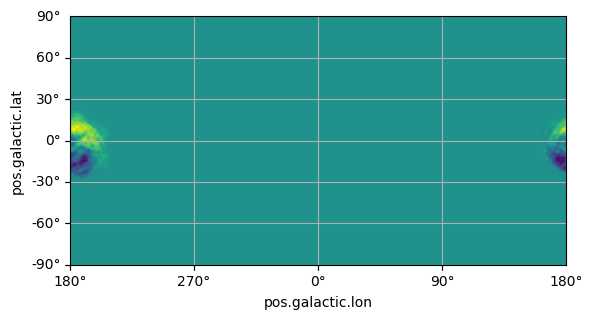

In [2]:
import astropy.io.fits as fits
from astropy.table import Table
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

filepath = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap44_wideEBins/residuals.fits'
with fits.open(filepath) as hdul:
    # Access the data and header
    data = hdul[3].data
    header = hdul[3].header
    hdul.info()
    table = Table.read(hdul[2])
    wcs = WCS(header)

# Do further processing with the data and header

plt.subplot(projection=wcs)
plt.imshow(data, origin="lower", cmap='viridis')
plt.grid()

Filename: /home/tguethle/cookbook/SPI_cookbook/examples/Crab/dataset_skymap44/expo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SPI.-SKY.-IMA    1 ImageHDU        91   (359, 179)   float32   


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / IEEE 32-bit floating point values              
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                  360 / Length of data axis 1                          
NAXIS2  =                  180 / Length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'SPI.-SKY.-IMA'      / Extension name                                 
EXTREL  = '6.5     '           / ISDC release number                            
BASETYPE= 'DAL_ARRAY'          / Data Access Layer base type                    
TELESCOP= 'INTEGRAL'           / Telescope or mission name                      
ORIGIN  = 'ISDC    '           / Origin of FITS file                            
INSTRUME= 'SPI     '        

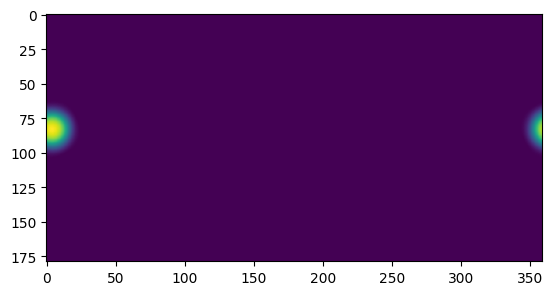

In [3]:
expo_map_path = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/dataset_skymap44/expo.fits'

with fits.open(expo_map_path) as hdul:
    hdul.info()
    expo_map = hdul[1].data
    expo_map_header = hdul[1].header

plt.imshow(expo_map)
header

In [4]:
def plot_skmap(filepath, Ebins=9, safe_plot=False, filename="skymap.png"):
    """
    plot the skymap as the backprojection of the residuals
    
    note: the labels are shifted by 180 degrees, so that the interesting part of the sky is in the middle
    
    """
    with fits.open(filepath) as hdul:
        # Access the data and header
        image_list = [hdul[bin].data for bin in range(3, Ebins+3)]
        wcs = WCS(hdul[3].header)

    fig, ax = plt.subplots(Ebins+2, 1, figsize=(20, 40), subplot_kw={'projection': wcs})
    for i in range(Ebins):
        data = np.pad(np.abs(image_list[i]), ((0,0), (0,180)), mode="wrap")[:, 180:]
        ax[i].imshow(data)
    ax[-2].set_title("Sum of all energy bins")
    ax[-2].imshow(np.pad(np.abs(np.sum(image_list, axis=0)), ((0,0), (0,180)), mode="wrap")[:, 180:])
    ax[-1].set_title("Sum of all energy bins - zoom in")
    im = ax[-1].imshow(np.pad(np.abs(np.sum(image_list, axis=0)), ((0,0), (0,180)), mode="wrap")[60:110, 180+160:180+210])
    fig.colorbar(im)
    plt.show()
    if safe_plot:
        fig.savefig(filename)


In [5]:
def plot_skmap(filepath, Ebins=9, safe_plot=False, filename="skymap.png"):
    """
    plot the skymap as the backprojection of the residuals
    
    note: the labels are shifted by 180 degrees, so that the interesting part of the sky is in the middle
    
    """
    with fits.open(filepath) as hdul:
        # Access the data and header
        image_list = [hdul[bin].data for bin in range(3, Ebins+3)]
        wcs = WCS(hdul[3].header)

    fig, ax = plt.subplots(Ebins+1, 1, figsize=(50, 100), subplot_kw={'projection': wcs})
    for i in range(Ebins):
        data = np.pad(image_list[i], ((0,0), (0,90)), mode="wrap")[:, 90:]
        ax[i].set_title(f"Energy bin {i+1} - lon shifted by 90 degrees")
        norm = TwoSlopeNorm(vmin=data.min(), vcenter=0, vmax=data.max())
        im = ax[i].imshow(data, cmap="PiYG", norm=norm, origin="lower")
        fig.colorbar(im)
        ax[i].scatter(181.44-90, -2.64, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='r')
        ax[i].scatter(184.558-90, -5.784, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='b')

    ax[-1].set_title("Sum of all energy bins - lon shifted by 90 degrees")
    combined_data = np.pad(np.sum(image_list, axis=0), ((0,0), (0,90)), mode="wrap")[:, 90:]
    norm = TwoSlopeNorm(vmin=combined_data.min(), vcenter=0, vmax=combined_data.max())
    im = ax[-1].imshow(combined_data, cmap="PiYG", norm=norm, origin="lower")
    fig.colorbar(im)
    ax[-1].scatter(181.44-90, -2.64, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='r', label='Pulsar 1A0535+262')
    ax[-1].scatter(184.558-90, -5.784, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='b', label="Crab")
    ax[-1].legend()

    
    plt.show()
    if safe_plot:
        fig.savefig(filename)


In [16]:
def plot_skmap_abs(filepath, Ebins=9, safe_plot=False, filename="skymap.png"):
    """
    plot the skymap as the backprojection of the residuals
    
    note: the labels are shifted by 180 degrees, so that the interesting part of the sky is in the middle
    
    """
    with fits.open(filepath) as hdul:
        # Access the data and header
        image_list = [hdul[bin].data for bin in range(3, Ebins+3)]
        wcs = WCS(hdul[3].header)

    fig, ax = plt.subplots(Ebins+1, 1, figsize=(50, 100), subplot_kw={'projection': wcs})
    for i in range(Ebins):
        data = np.pad(image_list[i], ((0,0), (0,90)), mode="wrap")[:, 90:]
        ax[i].set_title(f"Energy bin {i+1} - lon shifted by 90 degrees")
        data -= np.abs(data.min())
        data[data<0] = 0
        im = ax[i].imshow(data, cmap='Blues', origin="lower")
        fig.colorbar(im)
        ax[i].scatter(181.44-90, -2.64, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='r')
        ax[i].scatter(184.558-90, -5.784, transform=ax[i].get_transform("galactic"), s=100, facecolors='none', edgecolors='b')

    ax[-1].set_title("Sum of all energy bins - lon shifted by 90 degrees")
    combined_data = np.pad(np.sum(image_list, axis=0), ((0,0), (0,90)), mode="wrap")[:, 90:]
    combined_data -= np.abs(combined_data.min())
    combined_data[combined_data<0] = 0
    im = ax[-1].imshow(combined_data, cmap="Greens", origin="lower")
    fig.colorbar(im)
    ax[-1].scatter(181.44-90, -2.64, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='r', label='Pulsar 1A0535+262')
    ax[-1].scatter(184.558-90, -5.784, transform=ax[-1].get_transform("galactic"), s=100, facecolors='none', edgecolors='b', label="Crab")
    ax[-1].legend()

    
    plt.show()
    if safe_plot:
        fig.savefig(filename)


a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]


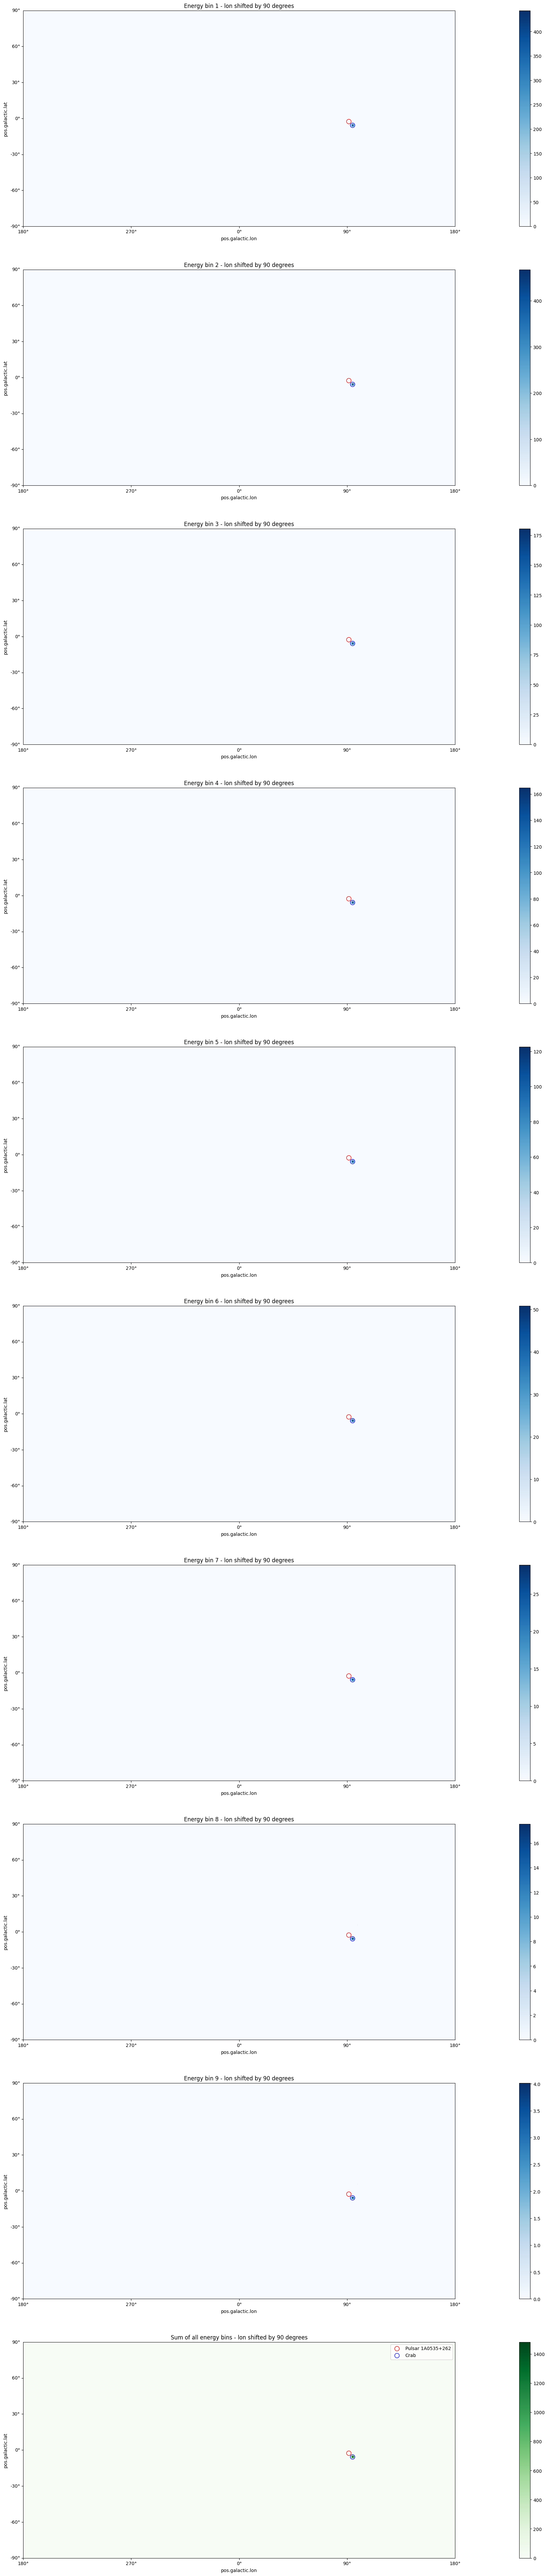

In [18]:
filepath = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap16/residuals.fits'

plot_skmap_abs(filepath, 9, safe_plot=True, filename="skymap16_noSource_abs.png")

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]


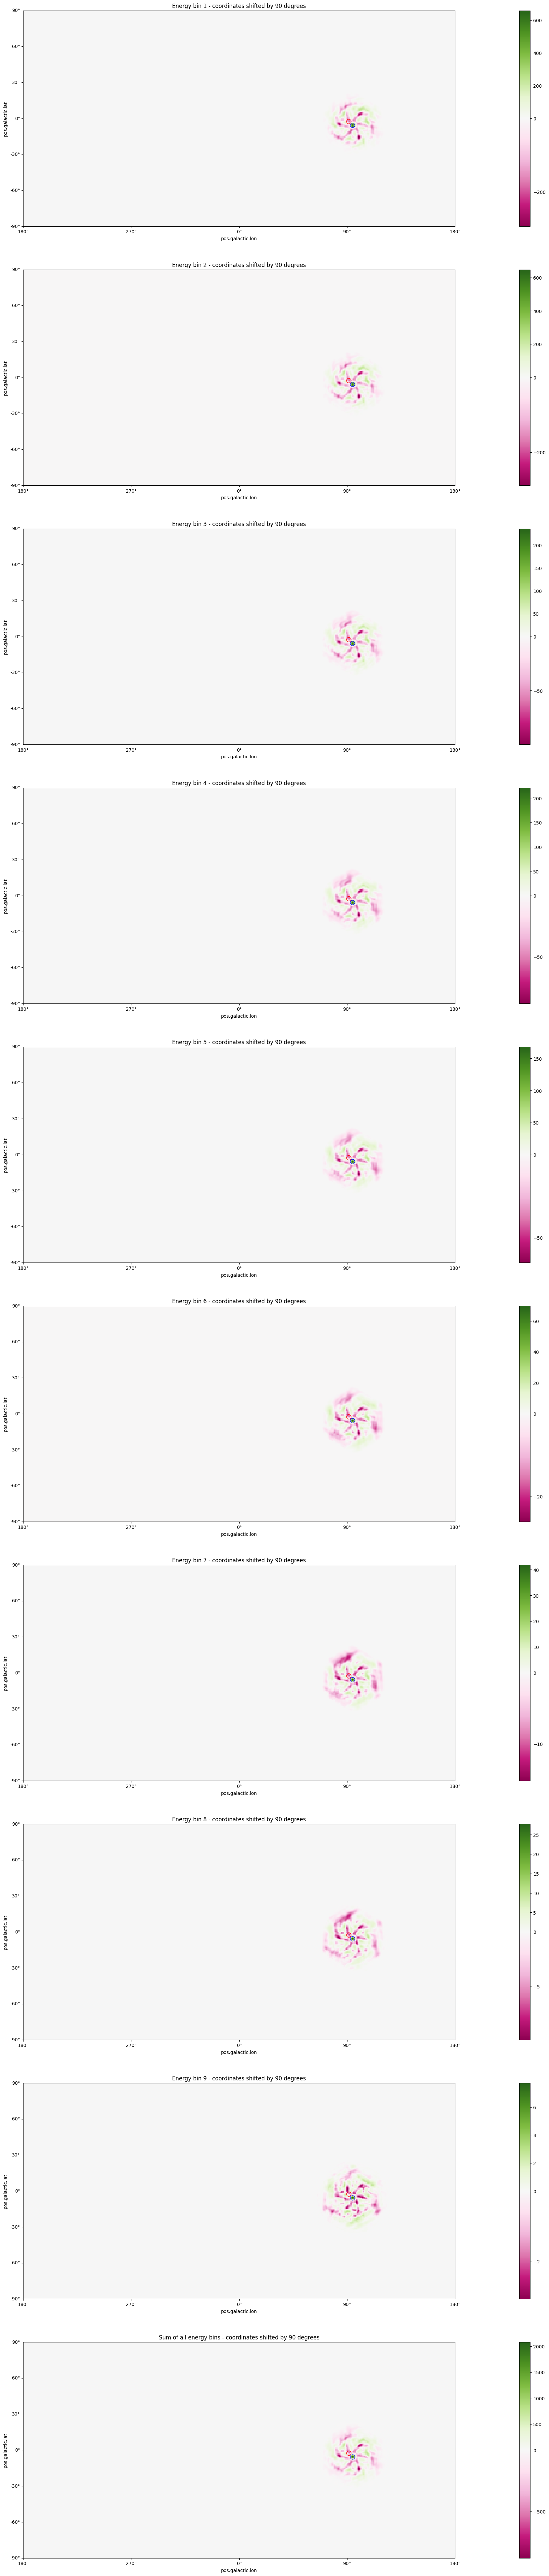

In [19]:
filepath_noSource = '/home/tguethle/cookbook/SPI_cookbook/examples/Crab/fit_Crab_skymap44_noSource_wideEBins/residuals.fits'

plot_skmap(filepath_noSource, 9, safe_plot=True, filename="skymap44")